In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [320]:
# 윈도우용 한글깨짐 방지
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [321]:
movie_train = pd.read_csv("./data/movies_train.csv")

In [322]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [323]:
movie_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.500,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.250,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.000,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.000,1,251,2,483387


- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

In [324]:
movie_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


corr_matrix = movie_train.corr()
sns.heatmap(np.abs(corr_matrix), annot=True, cmap = "Blues")

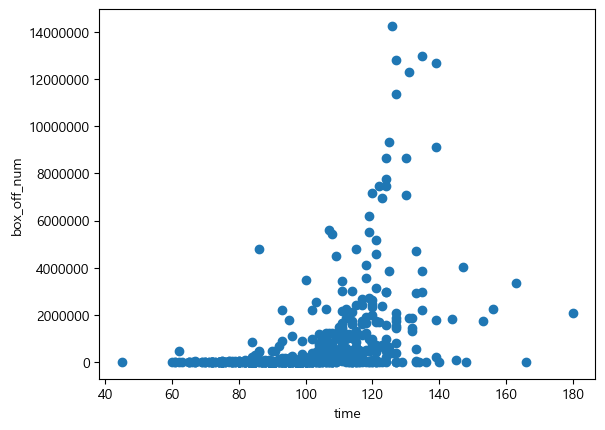

In [325]:
plt.scatter(data = movie_train, x = "time", y = "box_off_num")
plt.xlabel("time")
plt.ylabel("box_off_num")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

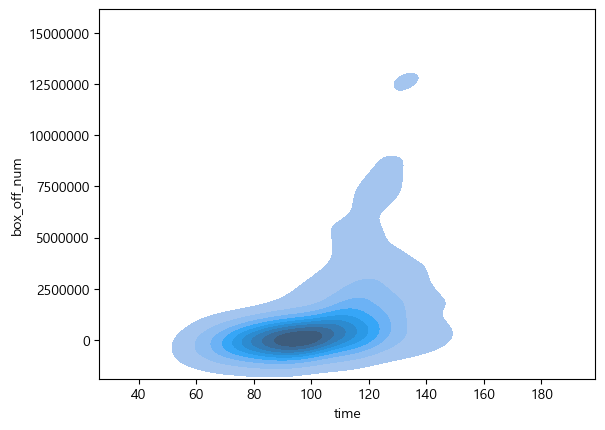

In [326]:
ax = sns.kdeplot(data = movie_train,
                x = "time",
                y = "box_off_num",
                fill = True)
ax.set_xlabel("time")
ax.set_ylabel("box_off_num")
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()

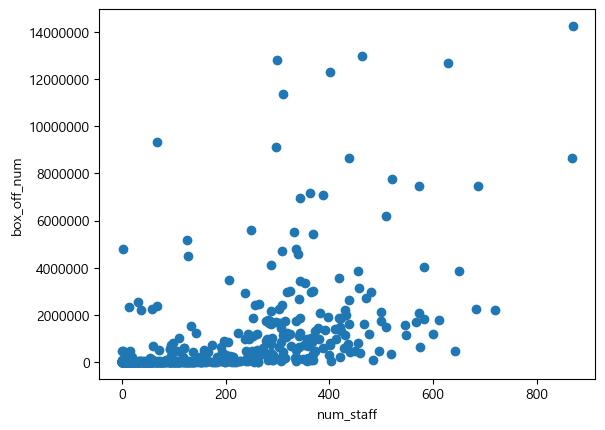

In [327]:
plt.scatter(data = movie_train, x = "num_staff", y = "box_off_num")
plt.xlabel("num_staff")
plt.ylabel("box_off_num")
plt.ticklabel_format(useOffset=False, style='plain')
# plt.ylim(0, 40000)
plt.show()

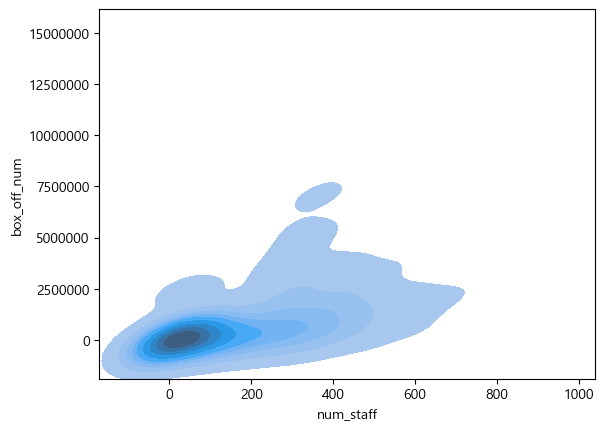

In [328]:
ax = sns.kdeplot(data = movie_train,
                x = "num_staff",
                y = "box_off_num",
                fill = True)
ax.set_xlabel("num_staff")
ax.set_ylabel("box_off_num")
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()

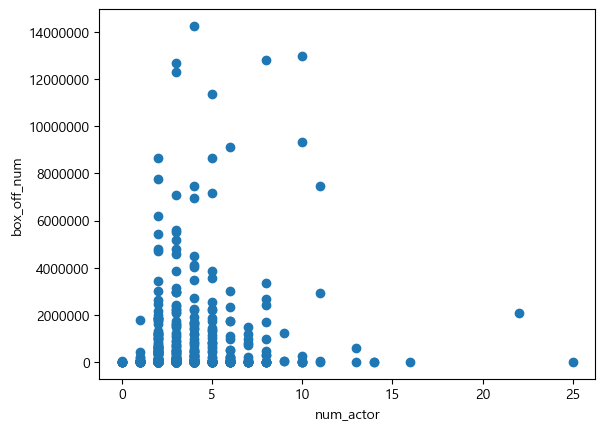

In [329]:
plt.scatter(data = movie_train, x = "num_actor", y = "box_off_num")
plt.xlabel("num_actor")
plt.ylabel("box_off_num")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

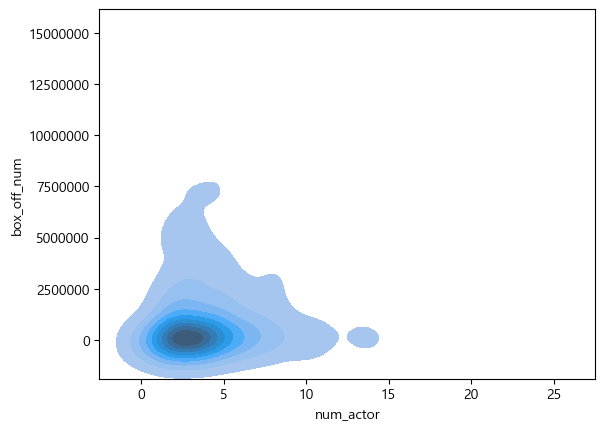

In [330]:
ax = sns.kdeplot(data = movie_train,
                x = "num_actor",
                y = "box_off_num",
                fill = True)
ax.set_xlabel("num_actor")
ax.set_ylabel("box_off_num")
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()

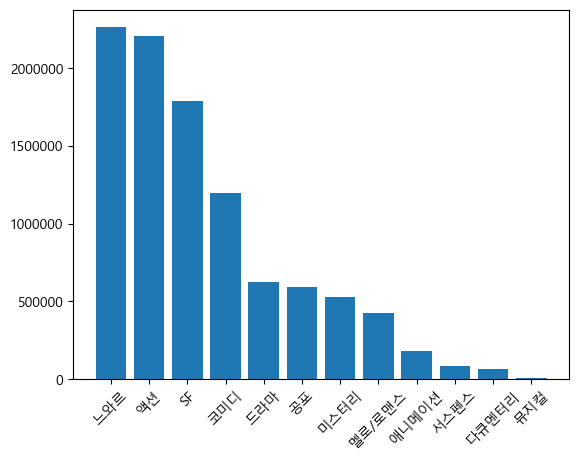

In [331]:
# 장르별 평균 관객
pd.options.display.float_format = '{:.3f}'.format # 과학적 표기법 대신 소수점 3자리까지 표현
genre_box_num = movie_train[["genre", "box_off_num"]].groupby("genre",as_index = False).mean().sort_values("box_off_num", ascending = False)

plt.bar(np.arange(len(genre_box_num)), genre_box_num["box_off_num"])
plt.xticks(np.arange(len(genre_box_num)), genre_box_num["genre"], size = 10, rotation = 45)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.show()

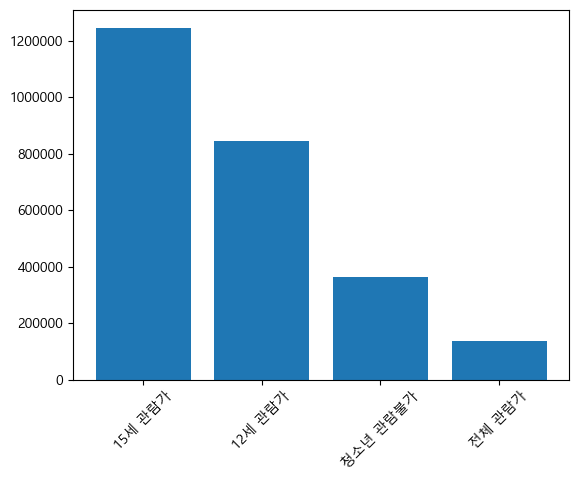

In [332]:
pd.options.display.float_format = '{:.3f}'.format # 과학적 표기법 대신 소수점 3자리까지 표현
screening_rat_box_num = movie_train[["screening_rat", "box_off_num"]].groupby("screening_rat",as_index = False).mean().sort_values("box_off_num", ascending = False)

plt.bar(np.arange(len(screening_rat_box_num)), screening_rat_box_num["box_off_num"])
plt.xticks(np.arange(len(screening_rat_box_num)), screening_rat_box_num["screening_rat"], size = 10, rotation = 45)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.show()

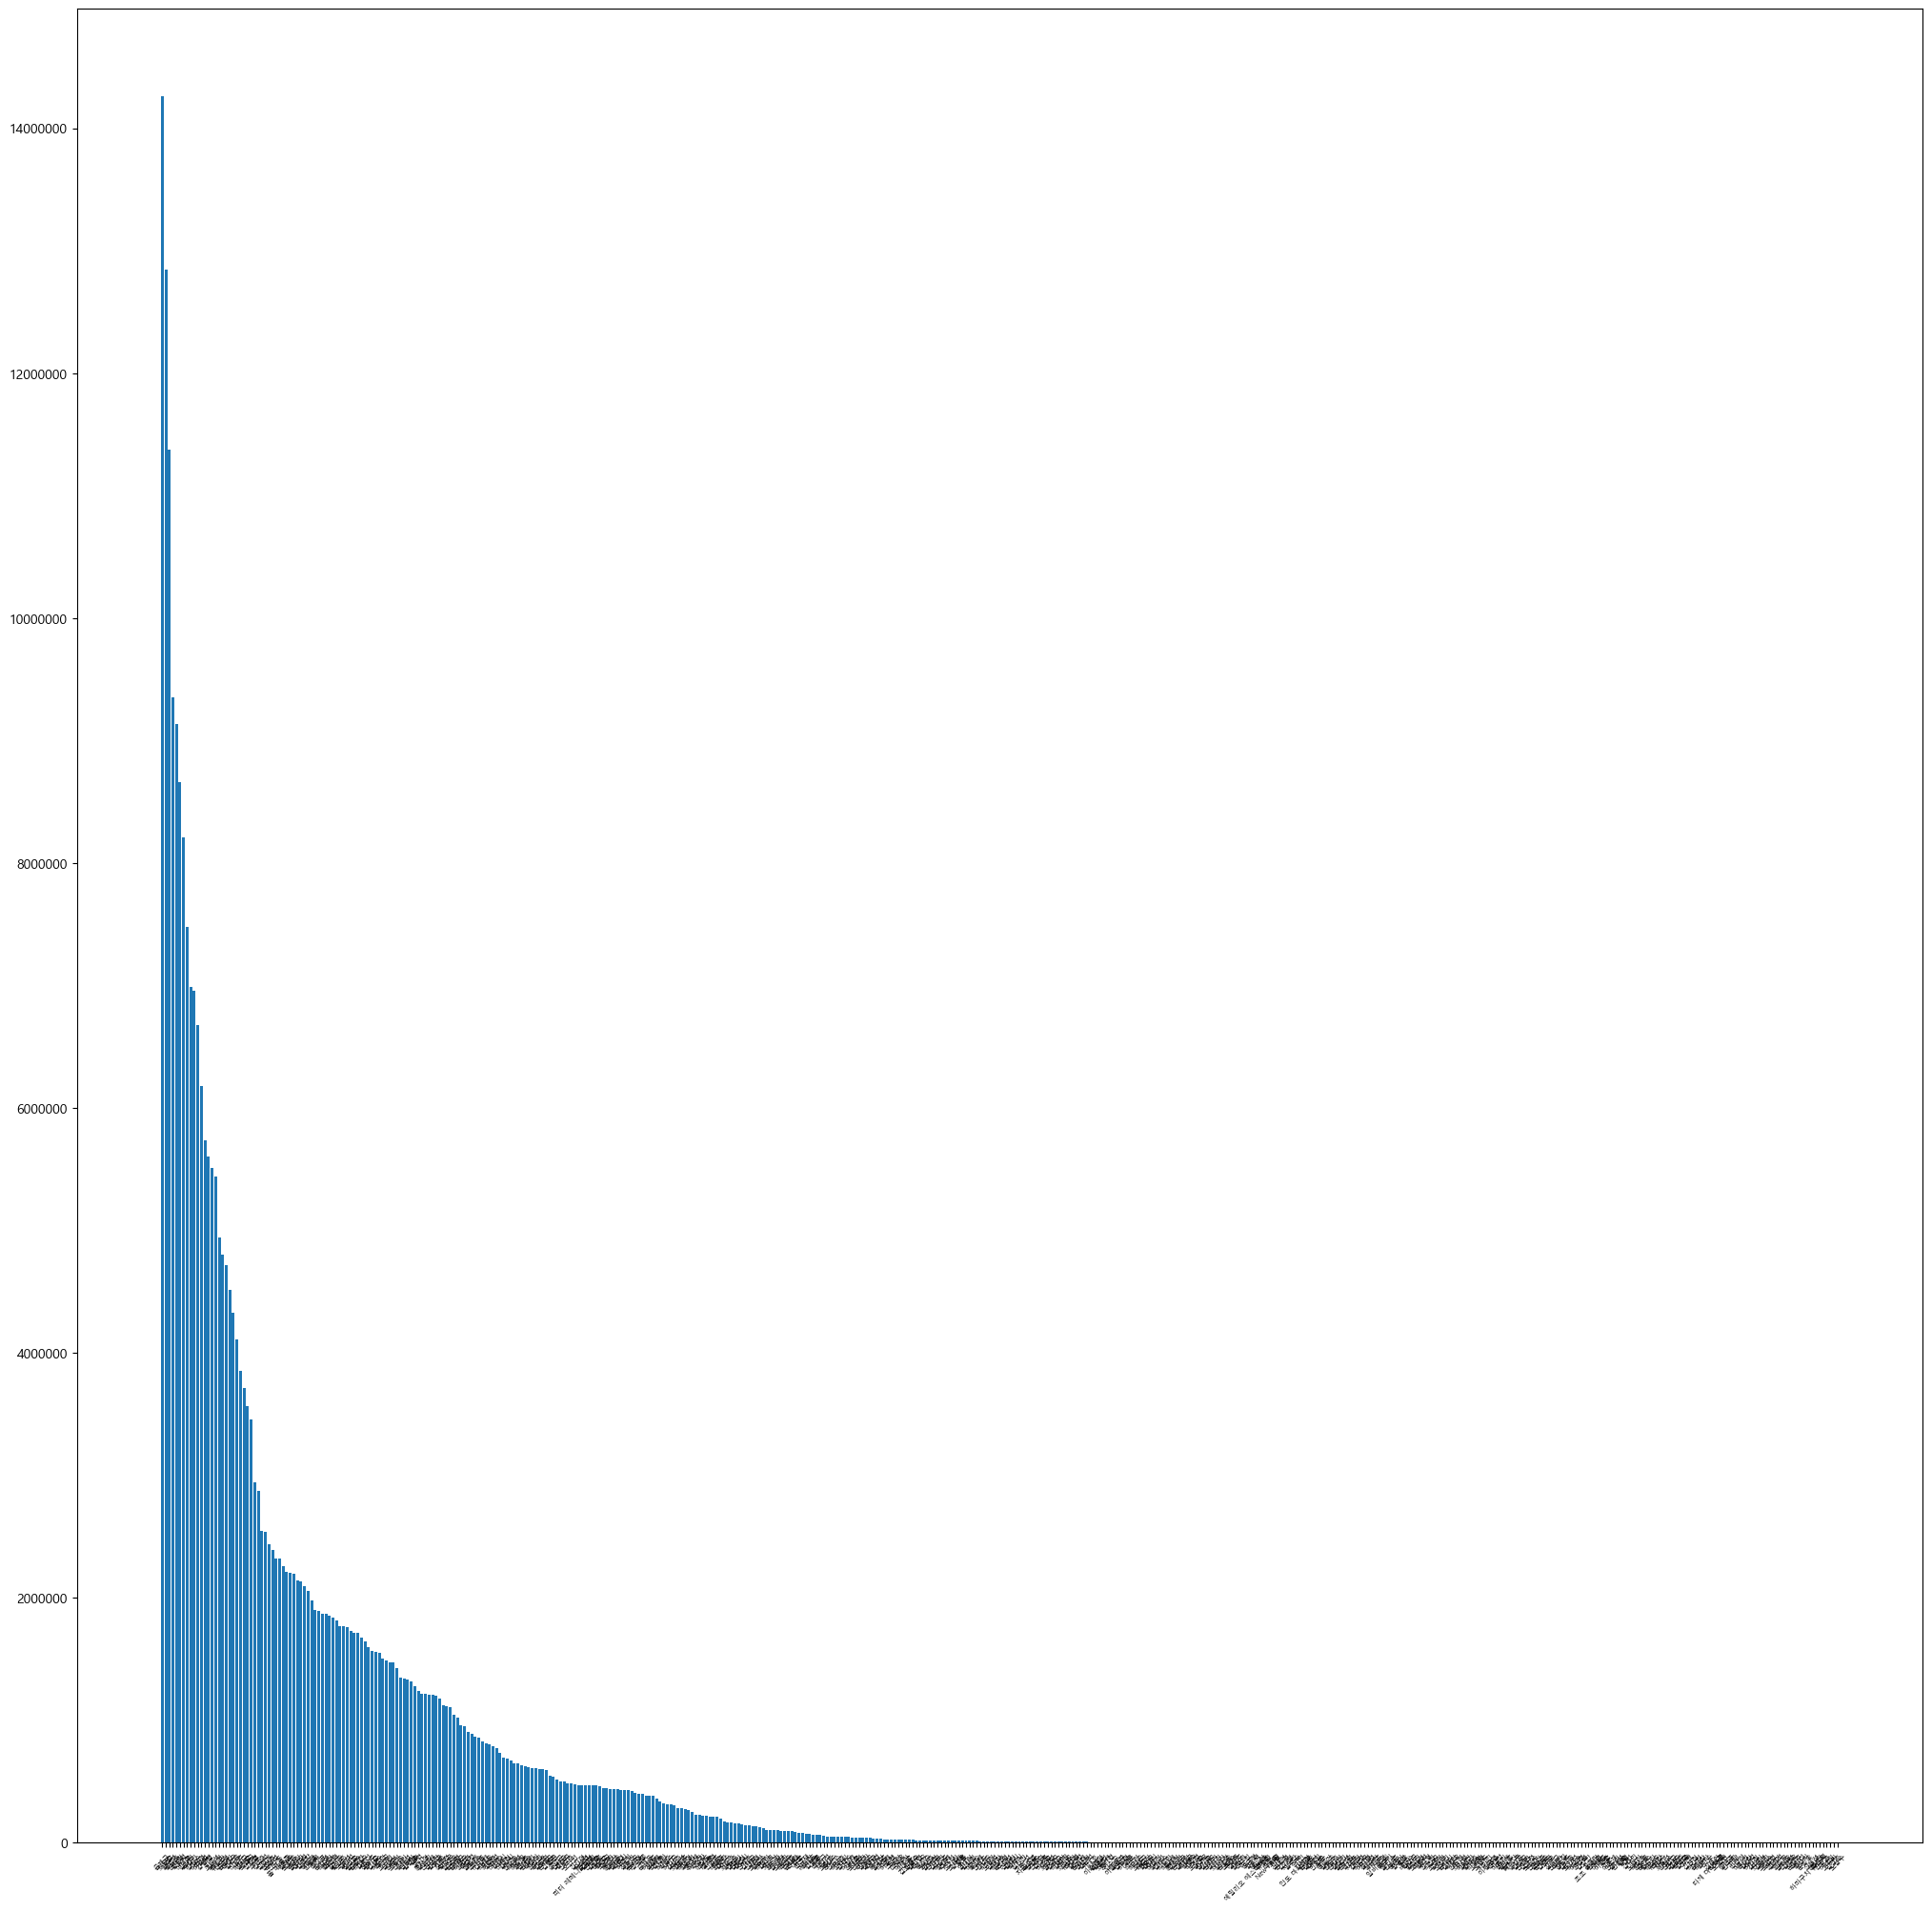

In [333]:
# 감독별 평균 관객
pd.options.display.float_format = '{:.3f}'.format # 과학적 표기법 대신 소수점 3자리까지 표현
director_box_num = movie_train[["director", "box_off_num"]].groupby("director",as_index = False).mean().sort_values("box_off_num", ascending = False)

plt.figure(figsize = (25,25))
plt.bar(np.arange(len(director_box_num)), director_box_num["box_off_num"])
plt.xticks(np.arange(len(director_box_num)), director_box_num["director"], size = 5, rotation = 45)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.show()

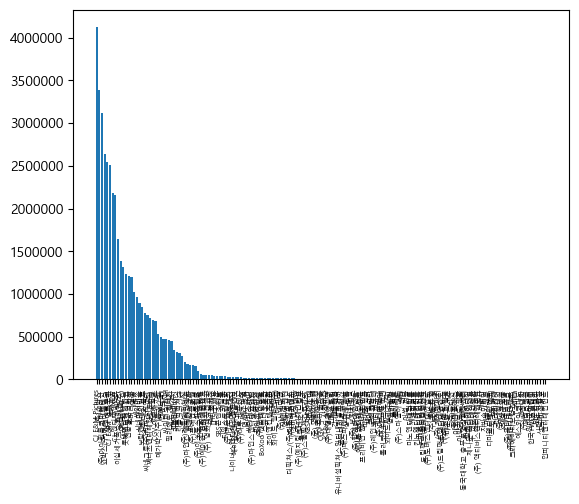

In [334]:
# 배급사별 평균 관객
pd.options.display.float_format = '{:.3f}'.format # 과학적 표기법 대신 소수점 3자리까지 표현
distributor_box_num = movie_train[["distributor", "box_off_num"]].groupby("distributor",as_index = False).mean().sort_values("box_off_num", ascending = False)

plt.bar(np.arange(len(distributor_box_num)), distributor_box_num["box_off_num"])
plt.xticks(np.arange(len(distributor_box_num)), distributor_box_num["distributor"],size = 5, rotation = 90)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.show()

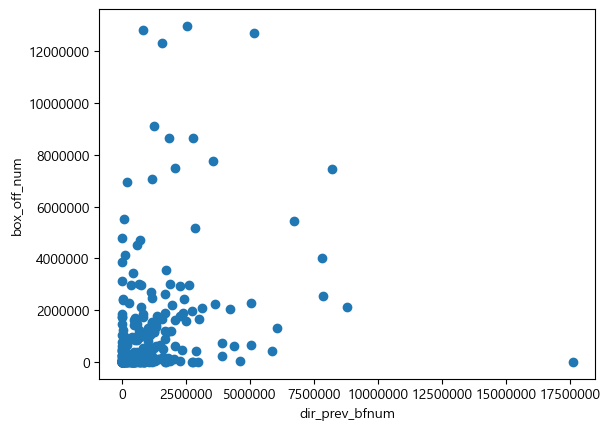

In [335]:
plt.scatter(data = movie_train, x = "dir_prev_bfnum", y = "box_off_num")
plt.xlabel("dir_prev_bfnum")
plt.ylabel("box_off_num")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

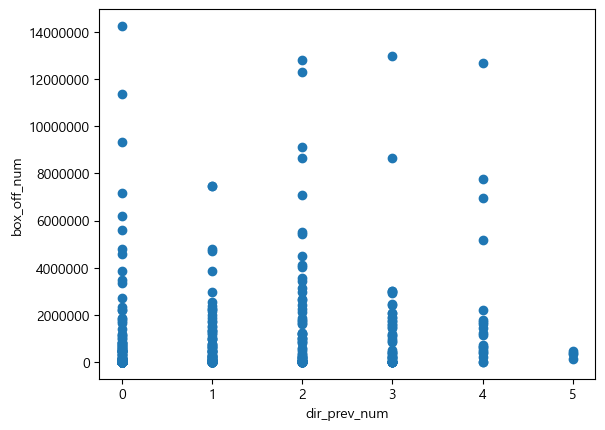

In [336]:
plt.scatter(data = movie_train, x = "dir_prev_num", y = "box_off_num")
plt.xlabel("dir_prev_num")
plt.ylabel("box_off_num")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [337]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [338]:
genre_box_num["genre"].values

array(['느와르', '액션', 'SF', '코미디', '드라마', '공포', '미스터리', '멜로/로맨스', '애니메이션',
       '서스펜스', '다큐멘터리', '뮤지컬'], dtype=object)

In [339]:
# 장르별 라벨 인코딩
genre_dic = {'느와르' : 11, '액션' : 10, 'SF' : 9, '코미디' : 8, '드라마' : 7, '공포' : 6, '미스터리' : 5, '멜로/로맨스' : 4, '애니메이션' : 3,
       '서스펜스' : 2, '다큐멘터리' : 1, '뮤지컬' : 0}
movie_train["genre"] = movie_train["genre"].map(genre_dic)

In [340]:
movie_train["genre"]

0      10
1      11
2      10
3       8
4       8
       ..
595     7
596     7
597     6
598    11
599    10
Name: genre, Length: 600, dtype: int64

In [341]:
movie_train["distributor"].unique()

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

- 쇼박스 = 쇼박스(주)미디어플렉스
- CJE&M, CJE&M 영화부문, CJ E&M pictures, CGV무비꼴라쥬, CGV아트하우스, 무비꼴라쥬, CJ엔터테인먼트, 필라멘트 픽쳐스, JK필름
- 싸이더스, 싸이더스 FNH, KT
- SK텔레콤(주), SK플래닛
- (주)마운틴픽쳐스, 마운틴 픽처스
- (주)NEW, NEW, 콘텐츠판다
- 드링팩트엔터테인먼트, (주)드림팩트엔터테인먼트, 조이앤시네마, (주)케이알씨지, 조이앤콘텐츠그룹, 스크린조이(https://namu.wiki/w/%EC%A1%B0%EC%9D%B4%EC%95%A4%EC%8B%9C%EB%84%A4%EB%A7%88)
- 리틀빅픽처스, 리틀빅픽쳐스, (주)리틀빅픽쳐스
- (주)스폰지이엔티, 스폰지
- 시네마달, (주)시네마달
- (주)더 픽처스, The 픽쳐스
- 씨너스엔터테인먼트, 플러스엠엔터테인먼트

In [342]:
for i in range(len(movie_train["distributor"])):
    if "쇼박스" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "쇼박스"
    elif "CJ" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "CJ"
    elif "CGV" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "CJ"    
    elif "무비꼴라쥬" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "CJ"
    elif "필라멘트 픽쳐스" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "CJ"
    elif "JK필름" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "CJ"
    elif "싸이더스" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "KT"
    elif "SK" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "SK"
    elif "마운틴 픽처스" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "(주)마운틴픽쳐스"
    elif "NEW" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "넥스트엔터테인먼트월드"
    elif "콘텐츠판다" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "넥스트엔터테인먼트월드"
    elif "드림팩트" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "드림팩트엔터테인먼트"
    elif "조이" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "드림팩트엔터테인먼트"
    elif "케이알씨지" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "드림팩트엔터테인먼트"
    elif "리틀빅" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "리틀빅픽쳐스"
    elif "스폰지" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "스폰지이엔티"
    elif "시네마달" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "시네마달"
    elif "(주)더픽쳐스" == movie_train["distributor"][i]:
        movie_train["distributor"][i] = "THE 픽쳐스"    
    elif "씨너스엔터" in movie_train["distributor"][i]:
        movie_train["distributor"][i] = "메가박스(주)플러스엠"

C:\Users\sungj\AppData\Local\Temp\ipykernel_15664\2408184114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_train["distributor"][i] = "쇼박스"
C:\Users\sungj\AppData\Local\Temp\ipykernel_15664\2408184114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_train["distributor"][i] = "쇼박스"
C:\Users\sungj\AppData\Local\Temp\ipykernel_15664\2408184114.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_train["distributo

In [343]:
distributor = movie_train[["distributor", "box_off_num"]].groupby("distributor",as_index = False).mean().sort_values("box_off_num", ascending = False)

In [344]:
# 배급사 별 라벨 인코딩
distributor_dic = dict()
j =1
for i in distributor["distributor"]:
    distributor_dic[i] = j
    j+=1    

movie_train["distributor"] = movie_train["distributor"].map(distributor_dic)

In [345]:
director = movie_train[["director", "box_off_num"]].groupby("director",as_index = False).mean().sort_values("box_off_num", ascending = False)
director_dic = dict()
j =1
for i in director["director"]:
    director_dic[i] = j
    j+=1    

movie_train["director"] = movie_train["director"].map(director_dic)

In [346]:
# 결측치 추가
movie_train["dir_prev_bfnum"].fillna(0, inplace = True)

In [347]:
movie_train[movie_train["box_off_num"] < 100]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
50,황구,71,8,2014-10-16,87,전체 관람가,394,695201.500,2,140,3,72
133,심도,5,7,2011-03-17,121,청소년 관람불가,464,0.000,0,92,4,74
168,망대,71,1,2015-03-12,66,전체 관람가,463,0.000,0,13,0,65
177,90분,139,6,2012-08-23,94,청소년 관람불가,467,0.000,0,55,2,42
193,러브멘토,137,4,2014-04-17,74,청소년 관람불가,465,1556.000,1,0,2,54
199,시티 오브 크레인,134,7,2010-05-06,95,12세 관람가,463,0.000,0,65,3,90
312,집,5,3,2011-03-17,83,15세 관람가,461,0.000,0,198,6,81
324,청아,141,7,2014-09-25,92,청소년 관람불가,471,0.000,0,3,4,2
338,타부 : 금지된 사랑,140,4,2015-09-03,78,청소년 관람불가,470,17615314.000,1,27,3,8
410,전망 좋은 방-밀애,85,4,2012-11-08,71,청소년 관람불가,469,0.000,0,0,3,10


In [348]:
for i in range(len(movie_train["release_time"])):
    movie_train["release_time"][i] = movie_train["release_time"][i][5:7]

C:\Users\sungj\AppData\Local\Temp\ipykernel_15664\3005423237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_train["release_time"][i] = movie_train["release_time"][i][5:7]
C:\Users\sungj\AppData\Local\Temp\ipykernel_15664\3005423237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_train["release_time"][i] = movie_train["release_time"][i][5:7]
C:\Users\sungj\AppData\Local\Temp\ipykernel_15664\3005423237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

C:\Users\sungj\AppData\Local\Temp\ipykernel_15664\3005423237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_train["release_time"][i] = movie_train["release_time"][i][5:7]
C:\Users\sungj\AppData\Local\Temp\ipykernel_15664\3005423237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_train["release_time"][i] = movie_train["release_time"][i][5:7]
C:\Users\sungj\AppData\Local\Temp\ipykernel_15664\3005423237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [349]:
onehot = pd.get_dummies(movie_train["screening_rat"], dtype = int)

In [350]:
df = pd.concat([movie_train, onehot], axis = 1)
rdf = df.drop(["screening_rat"], axis = 1)

In [351]:
rdf

,title,distributor,genre,release_time,time,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가
0,개들의 전쟁,7,10,11,96,208,0.000,0,91,2,23398,0,0,0,1
1,내부자들,1,11,11,130,28,1161602.500,2,387,3,7072501,0,0,0,1
2,은밀하게 위대하게,1,10,06,123,10,220775.250,4,343,4,6959083,0,1,0,0
3,나는 공무원이다,4,8,07,101,154,23894.000,2,20,6,217866,0,0,1,0
4,불량남녀,1,8,11,108,115,1.000,1,251,2,483387,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,4,7,08,111,65,3833.000,1,510,7,1475091,0,0,0,1
596,파파로티,1,7,03,127,56,496061.000,1,286,6,1716438,0,1,0,0
597,살인의 강,35,6,09,99,315,0.000,0,123,4,2475,0,0,0,1
598,악의 연대기,5,11,05,102,38,0.000,0,431,4,2192525,0,1,0,0


In [352]:
from sklearn.preprocessing import RobustScaler
y = rdf["box_off_num"]

In [353]:
rs = RobustScaler()
x = rs.fit_transform(rdf.drop(["title", "box_off_num"], axis = 1))

In [354]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

scaled_df = mm.fit_transform(movie_train.drop(["title", "box_off_num"], axis = 1))

In [355]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [356]:
lr = LinearRegression()
knr = KNeighborsRegressor()
logi = LogisticRegression()
rf = RandomForestClassifier(n_jobs = -1, random_state = 7)
gpr = GaussianProcessRegressor()

In [357]:
gpr.fit(x_train, y_train)

y_pred= gpr.predict(x_test)
MSE = mean_squared_error(y_test, y_pred) 
np.sqrt(MSE)

1420652.796558444

In [358]:
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))
y_pred= lr.predict(x_test)
MSE = mean_squared_error(y_test, y_pred) 
np.sqrt(MSE)

0.38020655636251466
0.33737007043551037


1364228.9348935185

In [359]:
knr.fit(x_train, y_train)
print(knr.score(x_train, y_train))
print(knr.score(x_test, y_test))
y_pred= knr.predict(x_test)
MSE = mean_squared_error(y_test, y_pred) 
np.sqrt(MSE)

0.44439486827547015
0.14270457931481983


1551732.958077595

In [360]:
logi.fit(x_train, y_train)
print(logi.score(x_train, y_train))
print(logi.score(x_test, y_test))
y_pred= logi.predict(x_test)
MSE = mean_squared_error(y_test, y_pred) 
np.sqrt(MSE)

0.71875
0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1970196.747639158

In [361]:
rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))
y_pred= rf.predict(x_test)
MSE = mean_squared_error(y_test, y_pred) 
np.sqrt(MSE)

1.0
0.008333333333333333


1666118.1305942964

In [362]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [363]:
lgb_model = LGBMRegressor(n_estimators=25, random_state = 0)
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 531
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 13
[LightGBM] [Info] Start training from score 754889.233333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(n_estimators=25, random_state=0)

In [364]:
y_pred= lgb_model.predict(x_test)
MSE = mean_squared_error(y_test, y_pred) 
np.sqrt(MSE)

584965.647332898

In [365]:
xgb_model = XGBRegressor(n_estimators=50, random_state = 0)
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [366]:
y_pred= xgb_model.predict(x_test)
MSE = mean_squared_error(y_test, y_pred) 
np.sqrt(MSE)

621134.2402605525

<Axes: >

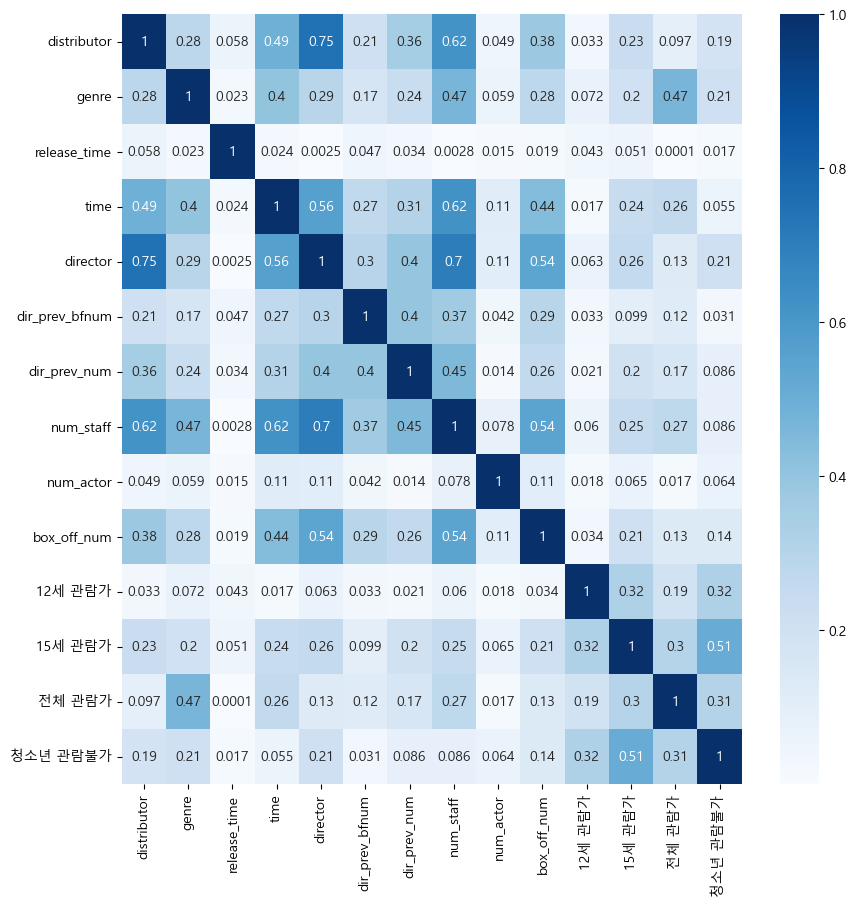

In [367]:
corr_matrix = rdf.drop(["title"], axis =1).corr()
plt.figure(figsize =(10, 10))
sns.heatmap(np.abs(corr_matrix), annot=True, cmap = "Blues")